In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [74]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [75]:
df = pd.read_csv('FINALDATAdaily.csv')
#usuwanko szumu na poczatku
df = df.iloc[300:]

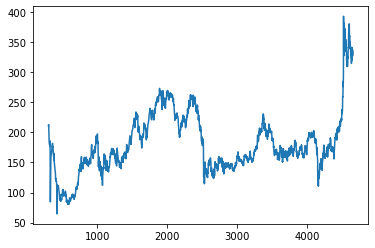

In [76]:
plt.plot(df['price'])

In [77]:
#Divide into training, test sets
RATIO = 0.8
train_length = np.int(RATIO*len(df))

train = df['price'].iloc[:train_length]
test = df['price'].iloc[train_length-1:]

scaler = MinMaxScaler(feature_range=(0,1))

In [78]:
# Preparing Data
train_scaled = scaler.fit_transform(train.values.reshape(-1,1))

prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(train_scaled)):
    x_train.append(train_scaled[x-prediction_days:x,0])
    y_train.append(train_scaled[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))



In [84]:
# Building model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
108/108 [==============================] - 9s 82ms/step - loss: 0.0203
Epoch 2/25
108/108 [==============================] - 9s 83ms/step - loss: 0.0048
Epoch 3/25
108/108 [==============================] - 11s 103ms/step - loss: 0.0041
Epoch 4/25
108/108 [==============================] - 12s 110ms/step - loss: 0.0037
Epoch 5/25
108/108 [==============================] - 12s 113ms/step - loss: 0.0033
Epoch 6/25
108/108 [==============================] - 15s 136ms/step - loss: 0.0033
Epoch 7/25
108/108 [==============================] - 20s 181ms/step - loss: 0.0033
Epoch 8/25
108/108 [==============================] - 15s 139ms/step - loss: 0.0031
Epoch 9/25
108/108 [==============================] - 14s 125ms/step - loss: 0.0029
Epoch 10/25
108/108 [==============================] - 15s 138ms/step - loss: 0.0027
Epoch 11/25
108/108 [==============================] - 18s 168ms/step - loss: 0.0027
Epoch 12/25
108/108 [==============================] - 18s 168ms/step - loss: 

In [85]:
# Make Prediction on Test Data

test_scaled = scaler.fit_transform(test.values.reshape(-1,1))
x_test = []

for x in range(prediction_days, len(test_scaled)):
    x_test.append(test_scaled[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


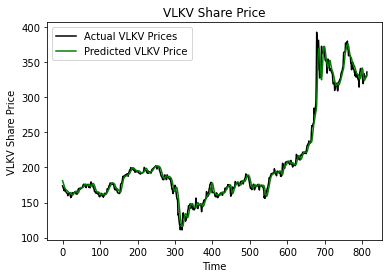

In [86]:
# Plot predictions
company = 'VLKV'
plt.plot(test[60:].values, color = "black", label = f"Actual {company} Prices")
plt. plot(predicted_prices, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()